Moved over content from Peng's tutorials, need to condense.

# Workshop: Optimization
**Part I**

In this coding exercise, we try to program up

* Gradient Descent

algorithms use logistic regression as an example.

---

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression

Logistic regression is one of the most fundamental method in machine learning.
Consider data set $\{a_i, y_i\}_{i=1}^m$, where $a_i \in \mathbb{R}^n$ is the data point and
$y_i \in \{0, 1\}$ is the corresponding label.

Our goal is to train a classifer $x \in \mathbb{R}^n$, such that the sign of $\langle a_i,x \rangle$ will indicate which class of $a_i$ belongs to, 0 or 1.
In order to do that following optimization problem are often considered,
$$
\min_x ~~\sum_{i=1}^m [\ln(1 + \exp(\langle a_i, x \rangle)) - y_i\langle a_i, x \rangle].
$$
And we will consider different variations of it though the workshop.
For more details of the derivation of the objective please check the lecture notes.

**Data Set**: We use MNIST 0 and 1 digits as the example data set, for more details please check [MNIST](http://yann.lecun.com/exdb/mnist/).

In [2]:
# load data
train_images = np.load('../data/train_images.npy')
train_labels = np.load('../data/train_labels.npy')
test_images = np.load('../data/test_images.npy')
test_labels = np.load('../data/test_labels.npy')

num_train_images = train_labels.size
num_test_images = test_labels.size
image_size = 28*28

print('number of training images: %i' % num_train_images)
print('number of testing images: %i' % num_test_images)

number of training images: 1000
number of testing images: 200


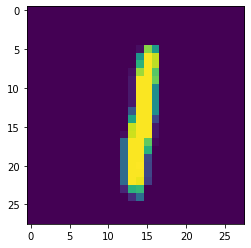

In [3]:
plt.imshow(train_images[2].reshape(28, 28))

## Gradient Descent

Recall that if we consider a $\beta$-smooth objective $f$, and want to solve the optimizatoin problem,
$$
\min_{x}~~f(x)
$$
the gradient descend algorithm can be specify as,

* input: $x_0$
* set $k = 0$
* while $\|\nabla f(x_k)\| \ge $ tolerance
\begin{align*}
x_{k+1} &\leftarrow x_k - \frac{1}{\beta} \nabla f(x_k)\\
k &\leftarrow k + 1
\end{align*}
end
* output: $x_k$ 

Now let us consider the algorithm in the context of logistic regression, where,
$$
f(x) = \sum_{i=1}^m [\ln(1 + \exp(\langle a_i, x \rangle)) - y_i\langle a_i, x \rangle] + \frac{\lambda}{2} \|x\|^2.
$$

Moreover,
$$
\nabla f(x) = \sum_{i=1}^m \frac{\exp(\langle a_i, x \rangle)}{1 + \exp(\langle a_i, x \rangle)} a_i - y_i a_i + \lambda x, \quad
\nabla^2 f(x) = \sum_{i=1}^m \frac{\exp(\langle a_i, x \rangle)}{(1+\exp(\langle a_i, x \rangle))^2} a_i a_i^\top + \lambda I.
$$

And since
$$
\frac{z}{(1+z)^2} \le \frac{1}{4}, \quad \forall z \ge 0,
$$
we have,
$$
\|\nabla^2 f(x)\| \le \frac{1}{4}\|A\|^2 + \lambda
$$
where $A = [a_1, a_2, \ldots, a_m]$. Therefore we could set our $\beta = \frac{1}{4}\|A\|^2 + \lambda$.

In [4]:
# function, gradient and Lipschitz constant
A = train_images
y = train_labels
lam = 0.1

beta = 0.25*np.linalg.norm(A, 2)**2 + lam

def func(x):
    z = A.dot(x)
    return np.sum(np.log(1.0 + np.exp(z)) - y*z) + 0.5*lam*np.sum(x**2)

def grad(x):
    z = A.dot(x)
    return A.T.dot(np.exp(z)/(1.0 + np.exp(z)) - y) + lam*x

In [5]:
# gradient descend algorithm
def optimizeWithGD(x0, func, grad, beta, tol=1e-6, max_iter=1000):
    """
    Optimize with Gradient Descent
        min_x f(x)
    where f is beta smooth.

    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Input x and return the function value.
    grad : function
        Input x and return the gradient.
    beta : float
        beta smoothness constant
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, others
    """
    # initial information
    x = np.copy(x0)
    g = grad(x)
    step_size = 1.0/beta
    #
    obj = func(x)
    err = np.linalg.norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err
    
    # start iterations
    iter_count = 0
    while err >= tol:
        # gradient descent step
        x -= step_size*g
        #
        # update function and gradient
        g = grad(x)
        #
        obj = func(x)
        err = np.linalg.norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        if iter_count >= max_iter:
            print('gradient descent reach maximum number of iteration.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 1
    #
    return x, obj_his[:iter_count+1], err_his[:iter_count+1], 0

In [6]:
# apply the algorithm
x0 = np.zeros(image_size)

x, obj_his, err_his, exit_flag = optimizeWithGD(x0, func, grad, beta)

gradient descent reach maximum number of iteration.


Text(0.5, 0.98, 'Gradient Descent on Logistic Regression')

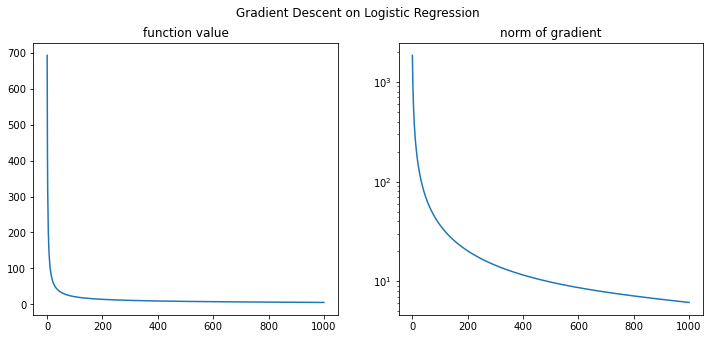

In [7]:
# plot convergence result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his)
ax[0].set_title('function value')
ax[1].semilogy(err_his)
ax[1].set_title('norm of gradient')
fig.suptitle('Gradient Descent on Logistic Regression')

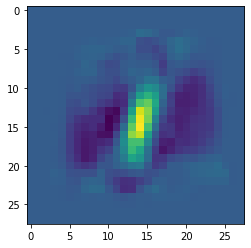

In [8]:
# plot the identifier
plt.imshow(x.reshape(28, 28))

In [9]:
# test result
A_test = test_images
y_test = test_labels

z_test = A_test.dot(x)

rate = np.sum(((z_test < 0.0) & (y_test == 0.0)) | ((z_test > 0.0) & (y_test == 1.0)))/num_test_images

print('correctly classify %0.2f of the testing data.' % rate)

correctly classify 1.00 of the testing data.


# Workshop: Optimization
**Part III**

In this coding exercise, we try to program up

* PALM Algorithm for Robust Logistic Regression
* SR3 Algorithm for Fast Sparse Logistic Regression

algorithms use logistic regression as an example.

---

In [10]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

In [11]:
# load data
train_images = np.load('../data/train_images.npy')
train_labels = np.load('../data/train_labels.npy')
test_images = np.load('../data/test_images.npy')
test_labels = np.load('../data/test_labels.npy')

num_train_images = train_labels.size
num_test_images = test_labels.size
image_size = 28*28

print('number of training images: %i' % num_train_images)
print('number of testing images: %i' % num_test_images)

number of training images: 1000
number of testing images: 200


## PALM Algorithm

[PALM](https://pdfs.semanticscholar.org/c2a3/59e9408191c9b26dfb7d4fc5389da19e208d.pdf)
algorithm is one of the most flexible method that can deal with structural non-smooth non-convex objective.
And [Trimming](https://arxiv.org/abs/1610.01101) is a very powerful robustification of any summable objective.
In this part, we will see how can we apply PALM to solve trimmed logistic regression.

Consider optimization problem,
$$
\min_{x, w\in\triangle_k}~~f(x,w):=\sum_{i=1}^m w_i h_i(x) + g(x)
$$
where,
$$
h_i(x) = \ln(1 + \exp(\langle a_i, x \rangle)) - y_i \langle a_i, x \rangle, \quad
g(x) = \lambda \|x\|_1,
$$
and $\triangle_k$ is the $k$-capped simplex,
$$
\triangle_k = \left\{w : w\in [0,1]^m, \sum_{i=1}^m w_i = k\right\}.
$$

PALM algorithm for this objective can be summarized as follows,

* input: $x_0$, $w_0$, $\tau$
* set $k = 0$
* while $\beta\|x_k - x_{k-1}\| \ge $ tolerance
\begin{align*}
x_{k+1} &\leftarrow \text{prox}_{g/\beta}(x_k - \tfrac{1}{\beta} \nabla_x f(x_k, w_k))\\
w_{k+1} &\leftarrow \text{proj}_{\triangle_h}(w_k - \tau \nabla_w f(x_{k+1}, w_k))\\
k &\leftarrow k + 1
\end{align*}
end
* output: $x_k$

In [12]:
# define functions
A = train_images
y = train_labels

lam = 1.0

beta_h = 0.25*np.linalg.norm(A, 2)**2

def func_h(x):
    z = A.dot(x)
    return np.log(1.0 + np.exp(z)) - y*z

def grad_h(x, w):
    z = A.dot(x)
    return (A.T*w).dot(np.exp(z)/(1.0 + np.exp(z)) - y)

def func_g(x):
    return lam*np.sum(np.abs(x))

def prox_g(x, t):
    t = lam*t
    y = np.zeros(x.size, dtype=x.dtype)

    ind = np.where(np.abs(x) > t)
    x_o = x[ind]

    y[ind] = np.sign(x_o)*(np.abs(x_o) - t)

    return y

In [13]:
# proximal gradient descent
def optimizeWithTrimmingPGD(x0, func_h, func_g, grad_h, prox_g, beta_h, num_inliers, N,
                            weight_step_size=1.0, tol=1e-6, max_iter=1000):
    """
    Optimize with Trimming Proximal Gradient Descent Method
        min_{x, w} <w, h(x)> + g(x)
    where h is beta smooth and g is proxiable.
    
    input
    -----
    x0 : array_like
        Starting point for the solver
    func_h : function
        Input x and return the function value of h
    func_g : function
        Input x and return the function value of g
    grad_h : function
        Input x and return the gradient of h
    prox_g : function
        Input x and a constant float number and return the prox solution
    beta_h : float
        beta smoothness constant for h
    num_inliers : int
        number of inliers
    N : int
        total number of data points
    weight_step_size : float, optional
        step size for the trimming weight
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
        
    output
    ------
    x : array_like
        Final solution
    w : array_like
        weights of the data points
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, others
    """
    # initial information
    x = x0.copy()
    w = np.repeat(num_inliers/N, N)
    g = grad_h(x, w)
    #
    step_size = 1.0/beta_h
    # not recording the initial point since we do not have measure of the optimality
    obj_his = np.zeros(max_iter)
    err_his = np.zeros(max_iter)
    
    # start iteration
    iter_count = 0
    err = tol + 1.0
    while err >= tol:
        # proximal gradient descent step
        x_new = prox_g(x - step_size*g, step_size)
        w_new = projCappedSimplex(w - weight_step_size*func_h(x_new), num_inliers)
        
        # update information
        obj = w_new.dot(func_h(x_new)) + func_g(x_new)
        err = np.linalg.norm(x - x_new)/step_size
        #
        np.copyto(x, x_new)
        np.copyto(w, w_new)
        g = grad_h(x, w)
        #
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        iter_count += 1
        if iter_count >= max_iter:
            print('Proximal gradient descent with trimming reach maximum of iteration')
            return x, w, obj_his[:iter_count], err_his[:iter_count], 1
    #
    return x, w, obj_his[:iter_count], err_his[:iter_count], 0

def projCappedSimplex(w, w_sum):
    a = np.min(w) - 1.0
    b = np.max(w) - 0.0

    def f(x):
        return np.sum(np.maximum(np.minimum(w - x, 1.0), 0.0)) - w_sum

    x = bisect(f, a, b)

    return np.maximum(np.minimum(w - x, 1.0), 0.0)

In [14]:
# apply the algorithm
x0 = np.zeros(image_size)

x, w, obj_his, err_his, exit_flag = optimizeWithTrimmingPGD(x0, func_h, func_g, grad_h, prox_g, beta_h,
                                                            int(0.95*num_train_images), num_train_images)

Proximal gradient descent with trimming reach maximum of iteration


Text(0.5, 0.98, 'Proximal Gradient Descent on Logistic Regression With Trimming')

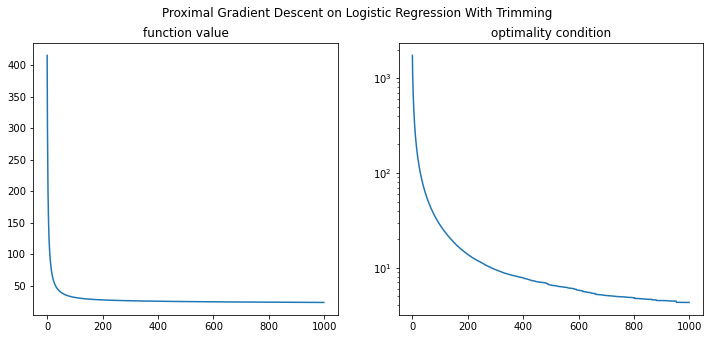

In [15]:
# plot convergence result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his)
ax[0].set_title('function value')
ax[1].semilogy(err_his)
ax[1].set_title('optimality condition')
fig.suptitle('Proximal Gradient Descent on Logistic Regression With Trimming')

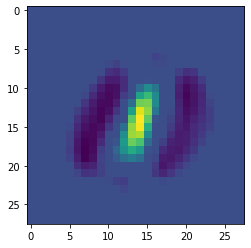

In [16]:
# plot the identifier
plt.imshow(x.reshape(28, 28))

In [17]:
# test result
A_test = test_images
y_test = test_labels

z_test = A_test.dot(x)

rate = np.sum(((z_test < 0.0) & (y_test == 0.0)) | ((z_test > 0.0) & (y_test == 1.0)))/num_test_images

print('correctly classify %0.2f of the testing data.' % rate)

correctly classify 1.00 of the testing data.


# Logistic Regression With Trimming

In this tutorial, we will play with the robust version of the classic binary classification problem.

**Brief summary**. Denote $\{y_i, a_i\}$ as our data pair, where $a_i$ is the $i$th image and $y_i$ is the corresponding label. Our goal is to come up with a classifier such that when there is a new image, we could automatically generate the label. When there are only two classes, for example all the $y_i$ are either $-1$ or $1$, we could use *logistic regression* to accomplish this goal. Moreover we will spin in a robust variation to automatically detect anomalies (weird images).

**Some math**. Assume $y_i \in \{-1, 1\}$, we could write out our negative log likelihood for trimming logistic regression.
$$
\min_{x, w}~~\frac{1}{m}\sum_{i=1}^m w_i\log(1 + \exp(-y_i \langle a_i, x \rangle)) + \frac{\lambda}{2}\|x\|^2
\quad \text{s.t.}~~0 \le w_i \le 1,~\sum_{i=1}^m w_i = h
$$
where $x$ is our classifier and $w$ is the trimming weights.

**Examples**. We will go throught two examples in this notebook,
* MNIST 0-1 classification
* Building classification

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
import solver
import utils_peng

## MNIST Problem

[MNIST](http://yann.lecun.com/exdb/mnist/) is the most classic dataset used for classification.
Our goal here is to classify the hand-written digits $0$ and $1$.

In [19]:
# load data
data_folder = "../data/"
training_images = np.load(data_folder + "train_images.npy")
training_labels = np.load(data_folder + "train_labels.npy")
testing_images = np.load(data_folder + "test_images.npy")
testing_labels = np.load(data_folder + "test_labels.npy")

image_shape = (28, 28)

training_data = utils_peng.ImageData(training_images, image_shape, labels=training_labels)
testing_data = utils_peng.ImageData(testing_images, image_shape, labels=testing_labels)

In [20]:
print("number of images:", training_data.num_images)
print("number of \"0\" images:", training_data.class_sizes[0])
print("number of \"1\" images:", training_data.class_sizes[1])

number of images: 1000
number of "0" images: 462
number of "1" images: 538


Text(0.5, 1.0, '0')

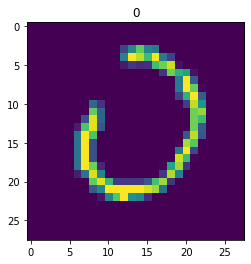

In [21]:
training_data.plot_image(0)
plt.title("0")

Text(0.5, 1.0, '1')

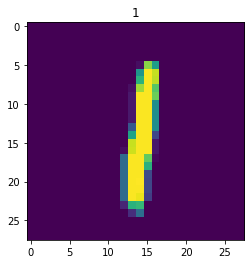

In [22]:
training_data.plot_image(600)
plt.title("1")

In [23]:
# create the model used for solving the classifier
model = solver.BinaryLogisticRegression(training_data, lam=0.1, inlier_pct=0.9)

In [24]:
classifier, outliers = model.fit_model(verbose=True)

initial obj: 6.93e-01
iter 1, obj 1.75e-01, err 9.92e+00
iter 2, obj 9.52e-02, err 5.23e+00
iter 3, obj 8.28e-02, err 3.46e+00
iter 4, obj 8.17e-02, err 2.87e+00
iter 5, obj 8.15e-02, err 1.38e+00
iter 6, obj 8.15e-02, err 1.40e+00
iter 7, obj 8.15e-02, err 6.30e-01
iter 8, obj 8.15e-02, err 5.05e-01
iter 9, obj 8.15e-02, err 4.93e-01
iter 10, obj 8.15e-02, err 4.09e-07


In [25]:
# use the classifier to predict the new images
classifier.modify_class_labels(np.array([0.0, 1.0]))
pred_labels = classifier.classify_images(testing_data.images)

print(pred_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
print("correct label pct in testing data: %0.2f" %
      (np.sum(pred_labels == testing_data.labels)/testing_data.num_images))

correct label pct in testing data: 1.00


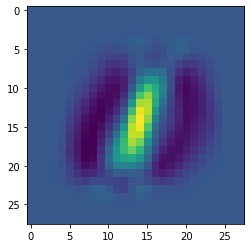

In [27]:
# check what is the classifier looks like
classifier.plot_classifier()

number of outlier images: 100
number of "0" outlier images: 50
number of "1" outlier images: 50


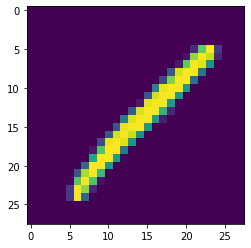

In [28]:
# check what is the outliers looks like
print("number of outlier images:", outliers.num_images)
print("number of \"0\" outlier images:", outliers.class_sizes[0])
print("number of \"1\" outlier images:", outliers.class_sizes[1])
outliers.plot_image(62)